In [7]:
import cv2
from matplotlib import pyplot as plt
import os
import numpy as np
import random

In [8]:
def randomized_img(path, num_images=10):
    files = [i for i in os.listdir(path) if i.lower().endswith(('png', 'jpg', 'jpeg'))]
    selected = random.sample(files, min(num_images, len(files)))
    return [os.path.join(path, file) for file in selected]

def display_images_grid(image_paths, grid_size=(2, 5)):
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(12, 6))
    axes = axes.flatten()
    
    for ax, img_path in zip(axes, image_paths):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        ax.imshow(img)
        ax.set_title(os.path.basename(img_path))
        ax.axis('off')
    
    for ax in axes[len(image_paths):]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Dataset Preview

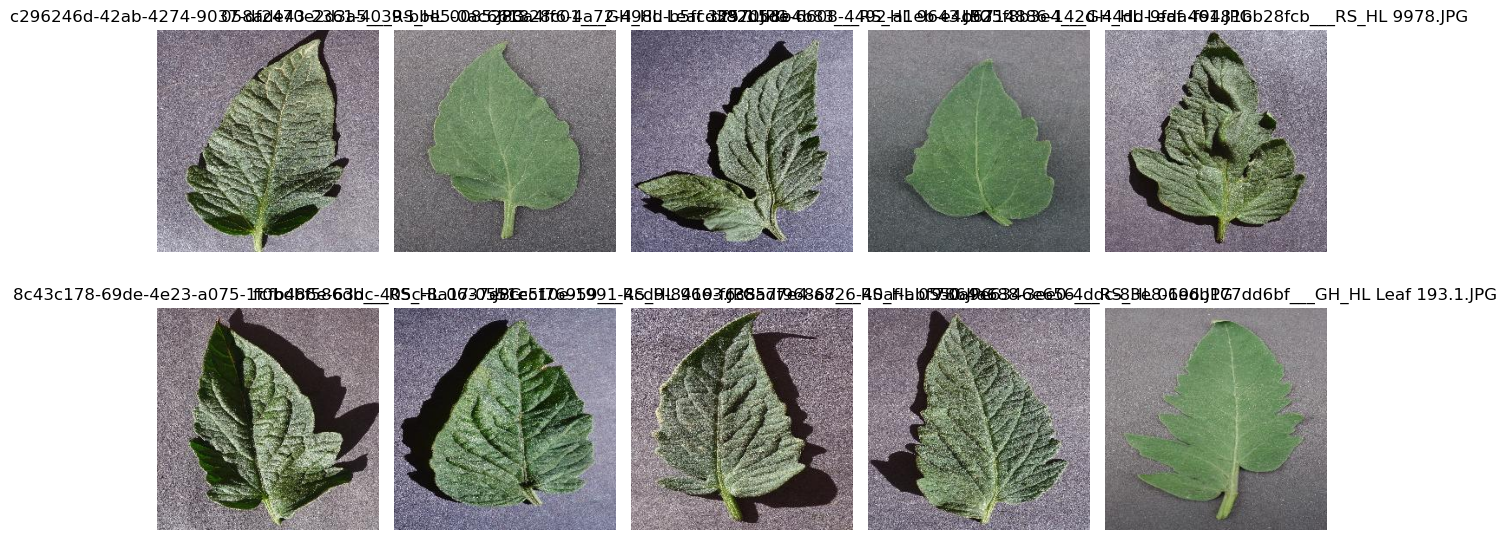

In [9]:
folder_path = "raw/color/Tomato___healthy"
image_paths = randomized_img(folder_path, num_images=10)
display_images_grid(image_paths)

# Image Segmentation

In [24]:
def display_segmented(image_paths, grid_size=(2, 5)):
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(12, 6))
    axes = axes.flatten()
    path_list = []
    
    for ax, img_path in zip(axes, image_paths):
        image = cv2.imread(img_path)                                # open the image
        image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)           # convert to RGB 
        image_hsv = cv2.cvtColor(image_rgb,cv2.COLOR_RGB2HSV)       # convert to HSV
        mask = cv2.inRange(image_hsv, (20, 0, 0), (80, 255, 255))   # choose the HSV range to make the mask
        kernel = np.ones((10, 10),np.uint8)
        mask_morph = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        mask_3ch = cv2.cvtColor(mask_morph, cv2.COLOR_GRAY2BGR)     # convert the mask to 3 channels
        foreground = cv2.bitwise_and(image_rgb, mask_3ch)           # remove the background
        image_bgr = cv2.cvtColor(foreground,cv2.COLOR_RGB2BGR)

        # Save the image to a folder
        filename = os.path.basename(img_path)
        save_path = os.path.join("segmented/", filename)
        cv2.imwrite(save_path, image_bgr)
        path_list.append(save_path)

        ax.imshow(foreground)                                       # show the images with removed background
        ax.set_title(os.path.basename(img_path))
        ax.axis('off')
    
    for ax in axes[len(image_paths):]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

    return path_list

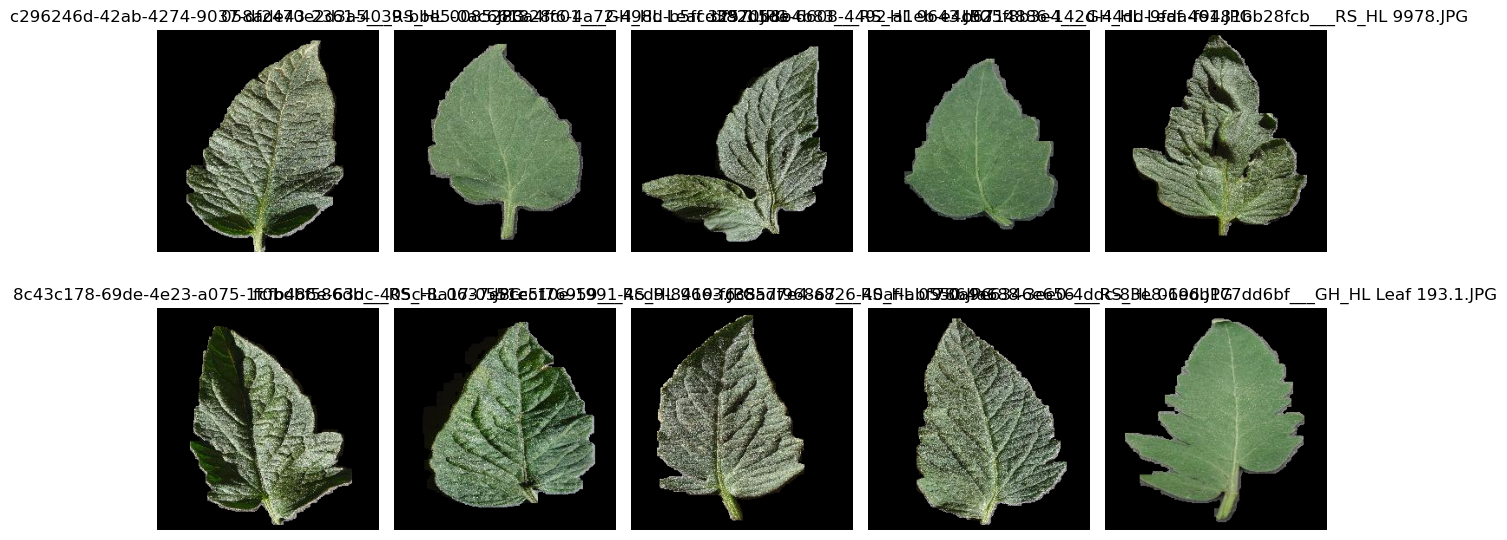

In [25]:
# Display
segmented_list = display_segmented(image_paths)

# Edge Detector

In [52]:
def display_edge(image_paths, grid_size=(2, 5)):
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(12, 6))
    axes = axes.flatten()
    
    for ax, img_path in zip(axes, image_paths):
        image = cv2.imread(img_path)                                # open the image
        image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)         # convert to greyscale 
        image_blur = cv2.GaussianBlur(image_gray, (15,15), 0)         # blur the image
        # sobelx = cv2.Sobel(src=image_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
        # sobely = cv2.Sobel(src=image_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
        # sobelxy = cv2.Sobel(src=image_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
        # sobel = sobelx+sobely+sobelxy
        canny = cv2.Canny(image=image_blur, threshold1=100, threshold2=100)

        ax.imshow(canny, cmap='grey')                                       # show the images with removed background
        ax.set_title(os.path.basename(img_path))
        ax.axis('off')
    
    for ax in axes[len(image_paths):]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

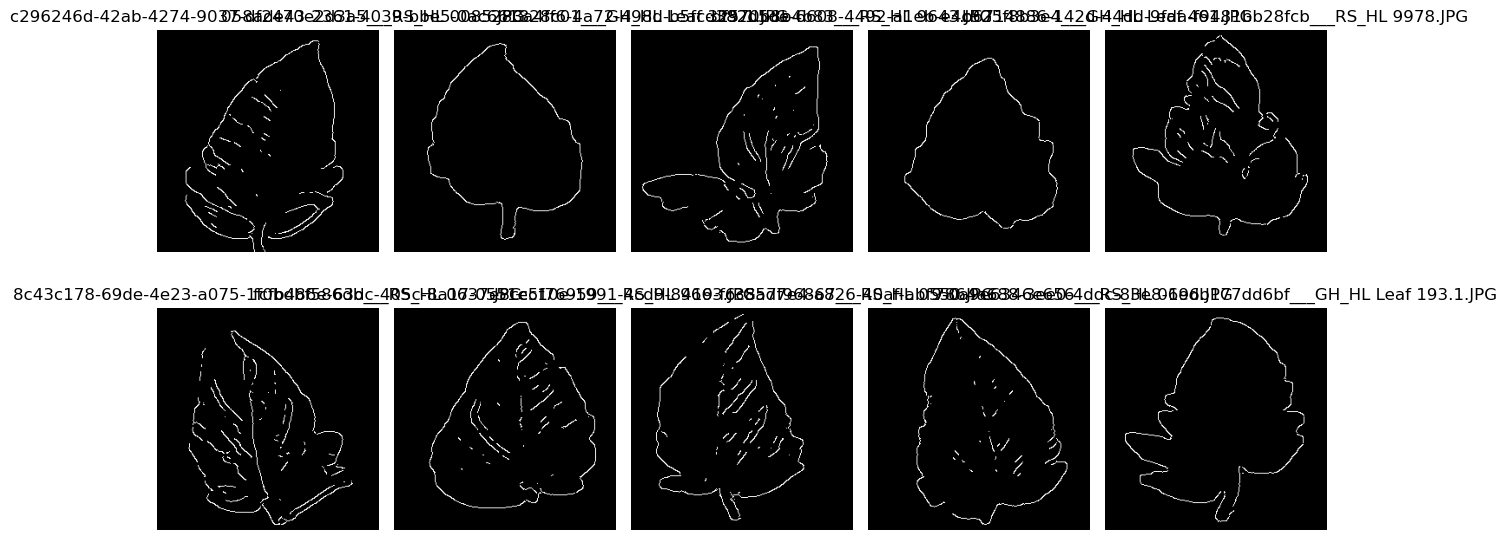

In [53]:
display_edge(segmented_list)